# 抓取萊特幣(Litecoin)

In [3]:
import requests
import pandas as pd

In [4]:
url="https://www.coingecko.com/price_charts/2/usd/max.json"
url_headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36"}
data = requests.get(url, headers = url_headers)
data

<Response [200]>

In [9]:
# 資料為json格式
prices = data.json()['stats']
values = data.json()['total_volumes']
# 轉成dataframe
df = pd.DataFrame(prices)
dfV = pd.DataFrame(values)
# 合併
df['volumes'] = dfV[1]  # 成交量
df.columns = ['datetime','price', 'volume']  # 給column name
df.head(5)

,datetime,price,volume
0,1367107200000,4.29983,0.0
1,1367193600000,4.35940,0.0
2,1367280000000,4.18295,0.0
3,1367366400000,3.64914,0.0
4,1367452800000,3.38879,0.0


In [10]:
# 將datetime欄位轉成日期格式, 資料取樣為天
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
# 轉成時間序列
df.index = df['datetime']
df.head()

,datetime,price,volume
datetime,,,
2013-04-28,2013-04-28,4.29983,0.0
2013-04-29,2013-04-29,4.35940,0.0
2013-04-30,2013-04-30,4.18295,0.0
2013-05-01,2013-05-01,3.64914,0.0
2013-05-02,2013-05-02,3.38879,0.0


Populating the interactive namespace from numpy and matplotlib


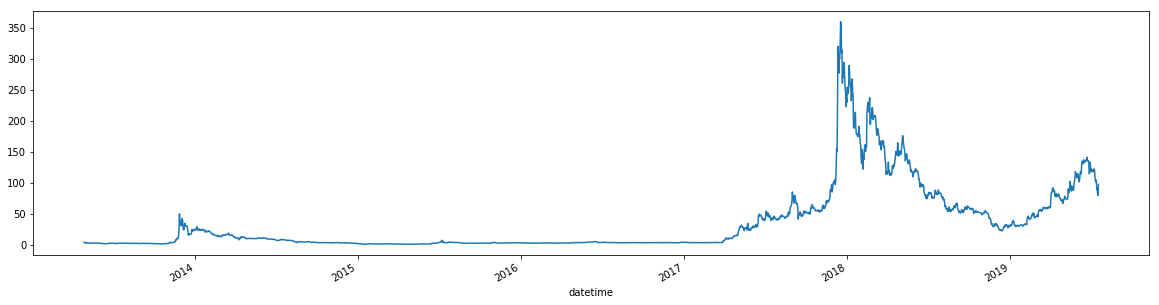

In [11]:
# 畫圖:價格
%pylab inline
df['price'].plot(kind = 'line', figsize=[20, 5])

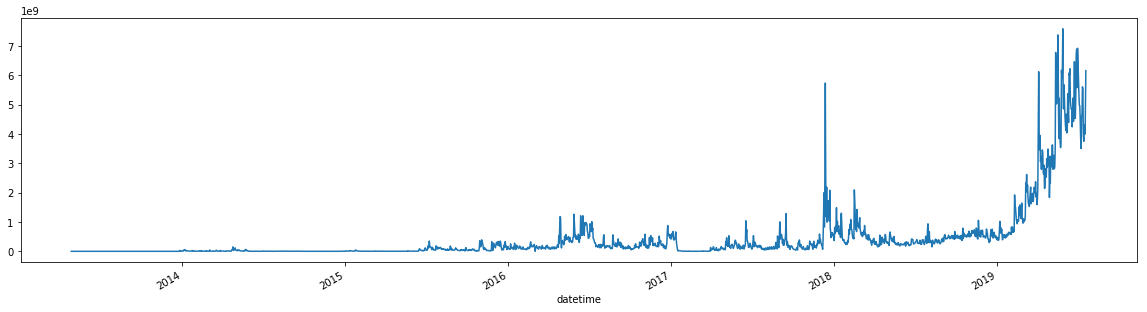

In [12]:
# 畫圖:成交量
df['volume'].plot(kind = 'line', figsize=[20, 5])

# MA技術指標

In [13]:
df['ma5'] = df['price'].rolling(window = 5).mean()
df['ma10'] = df['price'].rolling(window = 10).mean()

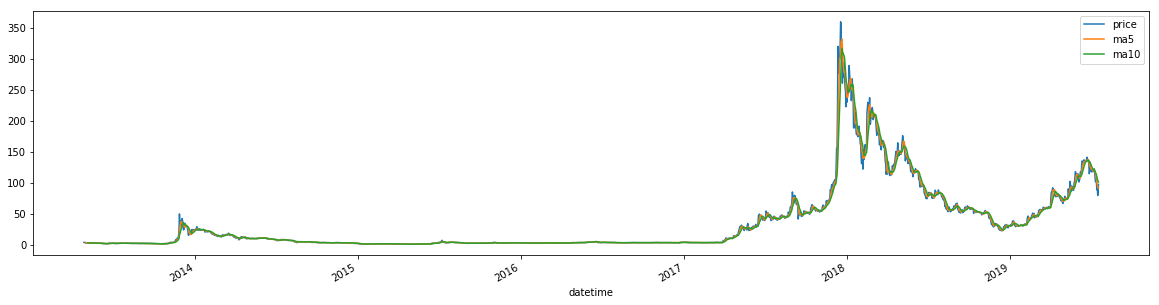

In [14]:
df[['price','ma5','ma10']].plot(kind = 'line', figsize=[20, 5])

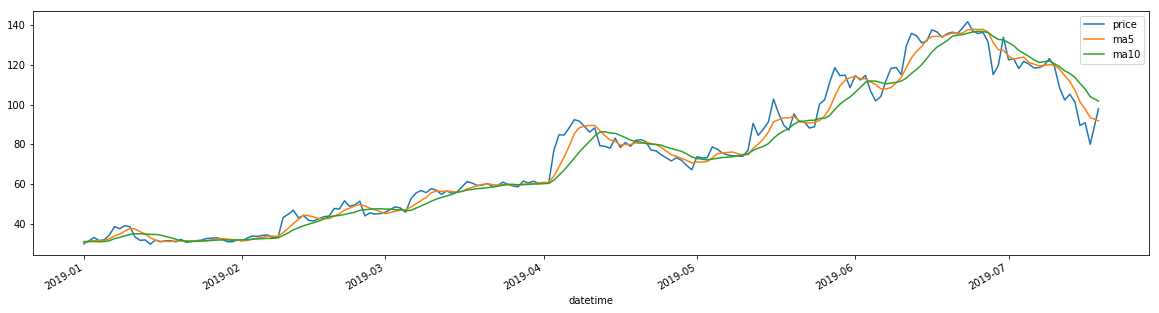

In [15]:
df2 = df[df['datetime'] >= '2019-01-01']
df2[['price','ma5','ma10']].plot(kind = 'line', figsize=[20, 5])

# 布林通道

In [16]:
df['ma20'] = df['price'].rolling(window = 20).mean()
df['std20'] = df['price'].rolling(window = 20).std()
df['BB+'] = df['ma20'] + df['price'].rolling(window = 20).std()*2
df['BB-'] = df['ma20'] - df['price'].rolling(window = 20).std()*2

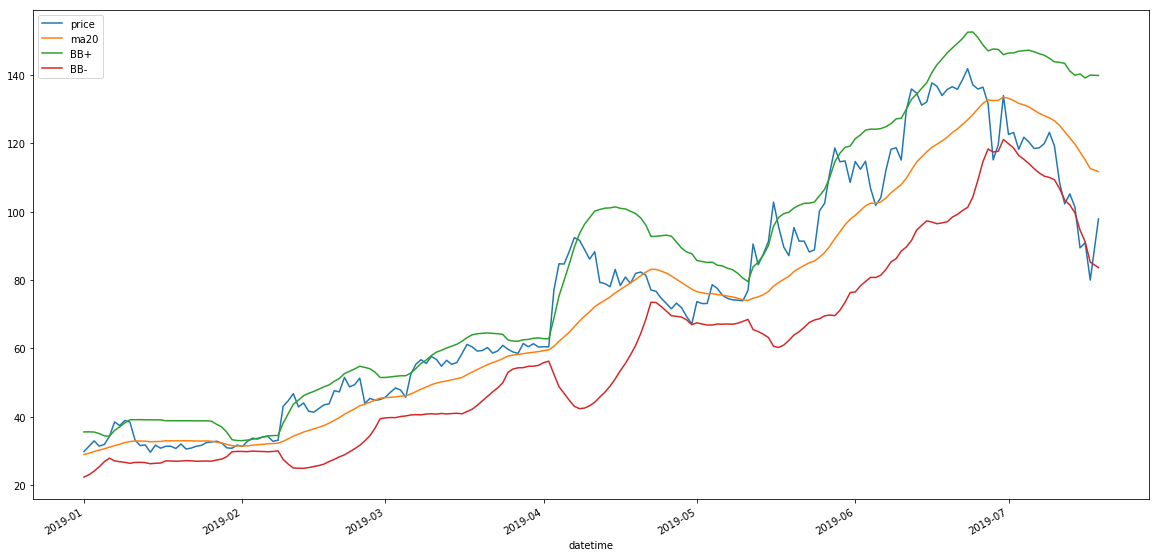

In [17]:
df4 = df[df['datetime'] >= '2019-01-01']
df4[['price','ma20','BB+', 'BB-']].plot(kind = 'line', figsize=[20, 10])

# 黃金交叉與死亡交叉

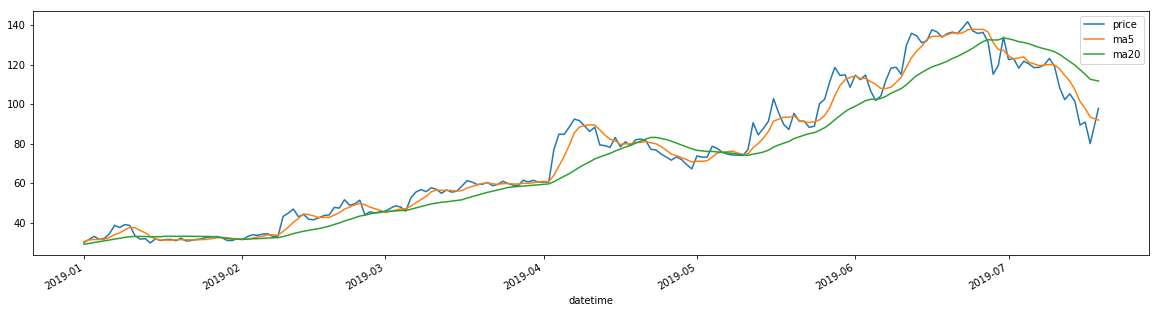

In [18]:
df5 = df[df['datetime'] >= '2019-01-01']
df5[['price', 'ma5','ma20']].plot(kind = 'line', figsize=[20, 5])